# Import library

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Exploring the data

In [247]:
data = pd.read_csv("BankChurners.csv")

In [248]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


### Data size

In [249]:
data.shape

(10127, 23)

### Check data types

In [250]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### Check null

In [251]:
display(data.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### Count values

In [252]:
data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

### Drop unimportant columns

Xóa 2 cột cuối

In [253]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True, axis = 1)
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True, axis = 1)

Xóa cột ID (không có ý nghĩa)

In [254]:
data.drop(['CLIENTNUM'], inplace = True, axis = 1)

Xóa những cột chỉ có một giá trị (không cần thiết trong trường hợp này)

In [255]:
for column in data.columns:
    if data[column].nunique() == 1:
        data.drop(column, inplace = True, axis = 1)

### Replace data

Thay thế một số dữ liệu dạng object

In [256]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [257]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Existing Customer', 0)
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Attrited Customer', 1)

Đối với các dữ liệu object không có tính cao thấp (giới tính, tình trạng hôn nhân), ta sử dụng phương pháp one hot encode để xử lý

In [258]:
one_hot_Gender = pd.get_dummies(data['Gender'])
one_hot_Marital_Status = pd.get_dummies(data['Marital_Status'])
one_hot_Education_Level = pd.get_dummies(data['Education_Level'])
one_hot_Income_Category = pd.get_dummies(data['Income_Category'])
one_hot_Card_Category = pd.get_dummies(data['Card_Category'])


In [259]:
data = data.join(pd.get_dummies(data['Education_Level'], prefix='Education_Level'))
data = data.join(pd.get_dummies(data['Income_Category'], prefix='Income_Category'))
data = data.join(pd.get_dummies(data['Gender'], prefix='Gender'))
data = data.join(pd.get_dummies(data['Marital_Status'], prefix='Marital_Status'))
data = data.join(pd.get_dummies(data['Card_Category'], prefix='Card_Category'))


In [260]:
data = data.drop('Gender',axis = 1)
data = data.drop('Marital_Status',axis = 1)
data = data.drop('Card_Category',axis = 1)
data = data.drop('Income_Category',axis = 1)
data = data.drop('Education_Level',axis = 1)

In [261]:
data.dtypes

Attrition_Flag                      int64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Income_Category_$120K +             uint8
Income_Category_$40K - $60K       

In [262]:
data.describe(percentiles = [.1, .25, .5, .75, .97, .999])

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.100030,0.044534,0.308877,0.198776,0.050953,0.146835,0.149995,0.071788,0.176755,0.138442,0.151575,0.351634,0.109805,0.529081,0.470919,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.300054,0.206289,0.462053,0.399098,0.219912,0.353959,0.357084,0.258150,0.381480,0.345380,0.358626,0.477504,0.312663,0.499178,0.499178,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,36.000000,1.000000,26.000000,2.000000,1.000000,1.000000,1762.000000,0.000000,683.000000,0.531000,1501.000000,33.000000,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
97%,1.000000,62.000000,5.000000,52.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,33048.440000,1.240440,14932.440000,114.000000,1.167000,0.836220,1.000000,1.0000

# Visualize the data

In [263]:
for column in data.columns:
    if data[column].dtypes != object:
        fig = px.histogram(data, x=column, nbins=100,  color_discrete_sequence=['deepskyblue'],width=800, height=600)
        fig.show()

In [264]:
fig = ff.create_distplot([data['Customer_Age']], group_labels = ['Customer_Age'], colors = ['turquoise'], curve_type='normal')
fig.show()

In [265]:
P = [np.mean(data[data.Card_Category_Blue == 1].Attrition_Flag), np.mean(data[data.Card_Category_Silver == 1].Attrition_Flag), 
     np.mean(data[data.Card_Category_Gold == 1].Attrition_Flag), np.mean(data[data.Card_Category_Platinum == 1].Attrition_Flag)]
fig = px.bar(x = ['Blue', 'Silver', 'Gold', 'Platinum'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Categories", y="Ratio"), width=800, height=600)
fig.show()

In [266]:
P = [np.mean(data[data.Education_Level_Unknown == 1].Attrition_Flag), np.mean(data[data.Education_Level_Uneducated == 1].Attrition_Flag), 
     np.mean(data[data['Education_Level_High School'] == 1].Attrition_Flag), np.mean(data[data.Education_Level_College == 1].Attrition_Flag),
     np.mean(data[data.Education_Level_Graduate == 1].Attrition_Flag), np.mean(data[data['Education_Level_Post-Graduate'] == 1].Attrition_Flag),
     np.mean(data[data.Education_Level_Doctorate == 1].Attrition_Flag)]
fig = px.bar(x = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Education_Level", y="Ratio"), width=800, height=600)
fig.show()

In [267]:
P = [np.mean(data[data.Marital_Status_Unknown == 1].Attrition_Flag), np.mean(data[data.Marital_Status_Single == 1].Attrition_Flag), 
     np.mean(data[data.Marital_Status_Married == 1].Attrition_Flag), np.mean(data[data.Marital_Status_Divorced == 1].Attrition_Flag)]
fig = px.bar(x = ['Unknown', 'Single', 'Married', 'Divorced'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Marital Status", y="Ratio"), width=800, height=600)
fig.show()

In [268]:
P = [np.mean(data[data.Gender_M == 1].Attrition_Flag), np.mean(data[data.Gender_F == 1].Attrition_Flag)]
fig = px.bar(x = ['Male', 'Female'], y = P, color_discrete_sequence= ['teal'], labels=dict(x="Gender", y="Ratio"), width=800, height=600)
fig.show()

In [269]:
fig = ff.create_distplot([data['Total_Trans_Ct']], group_labels = ['Total_Trans_Ct'], colors = ['turquoise'], curve_type='normal')
fig.show()

In [270]:
data.describe(percentiles = [.1, .25, .5, .75, .97, .999])

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.100030,0.044534,0.308877,0.198776,0.050953,0.146835,0.149995,0.071788,0.176755,0.138442,0.151575,0.351634,0.109805,0.529081,0.470919,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.300054,0.206289,0.462053,0.399098,0.219912,0.353959,0.357084,0.258150,0.381480,0.345380,0.358626,0.477504,0.312663,0.499178,0.499178,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,36.000000,1.000000,26.000000,2.000000,1.000000,1.000000,1762.000000,0.000000,683.000000,0.531000,1501.000000,33.000000,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
97%,1.000000,62.000000,5.000000,52.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,33048.440000,1.240440,14932.440000,114.000000,1.167000,0.836220,1.000000,1.0000

In [271]:
def normalize(a):
  return (a - a.min()) / (a.max() - a.min())

In [272]:
for column in data.columns:
    if data[column].max() > 1:
        data[column] = normalize(data[column])
data

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
1,0,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,0,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,0.4,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,0.230749,0.462,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
10123,1,0.319149,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,0.183899,0.511,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
10124,1,0.382979,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,0.220248,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
10125,1,0.085106,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,0.194400,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0


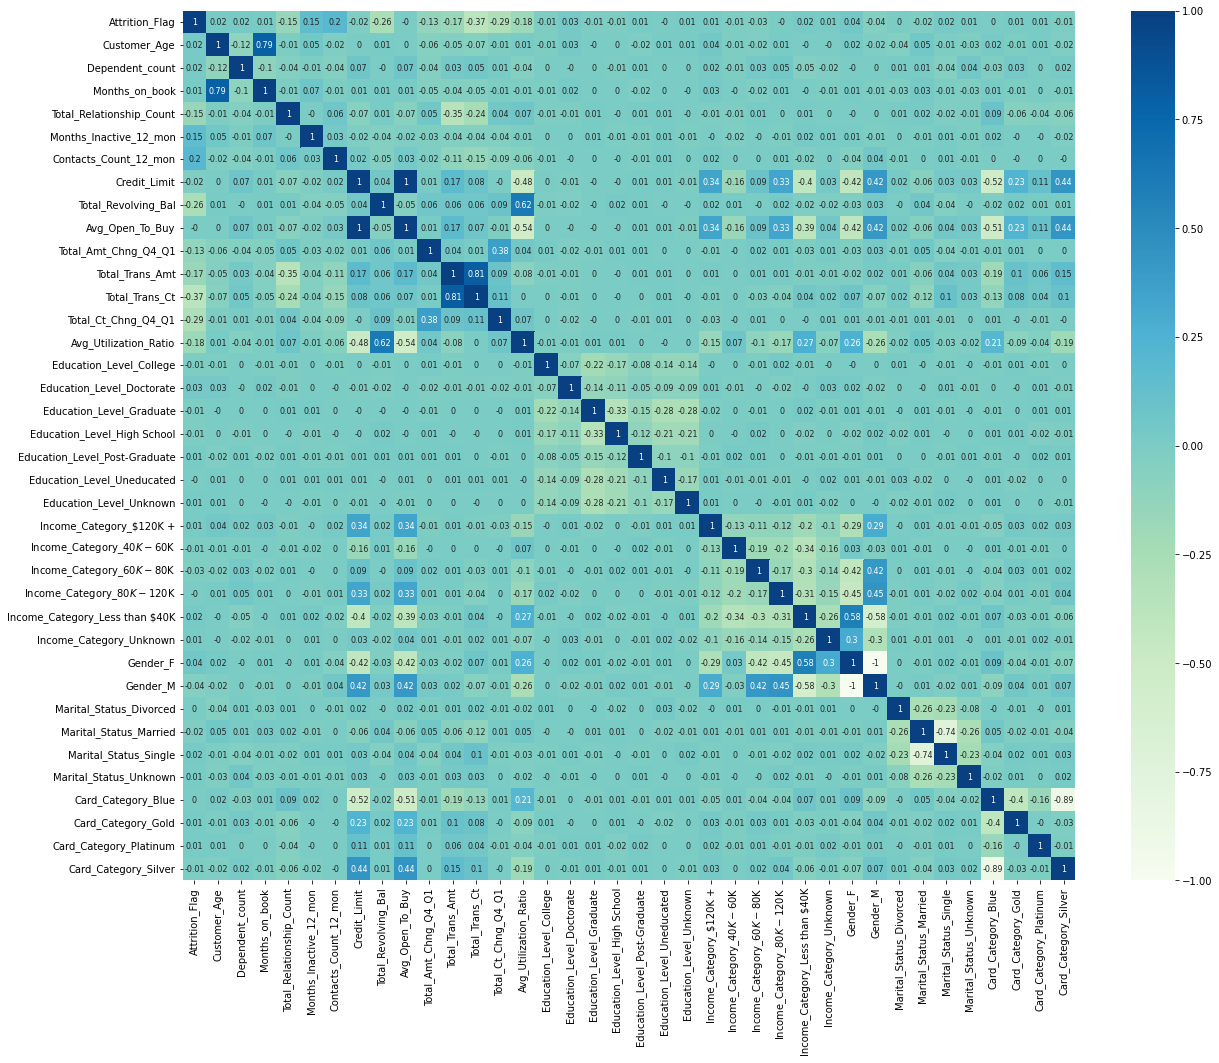

In [273]:
plt.figure(figsize=(20,16))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='GnBu', annot=True, 
            annot_kws={"size": 8}, vmin=-1, vmax=1);

In [274]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Gender_F', 'Gender_M',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Plat

In [275]:
data = data.rename(columns={'Education_Level_High School': 'Education_Level_High_School',
                            'Education_Level_Post-Graduate': 'Education_Level_Post_Graduate',
                            'Income_Category_$120K +': 'Income_Category_120K',
                            'Income_Category_$40K - $60K': 'Income_Category_40K_60K',
                            'Income_Category_$60K - $80K': 'Income_Category_60K_80K',
                            'Income_Category_$80K - $120K': 'Income_Category_80K_120K',
                            'Income_Category_Less than $40K': 'Income_Category_Less_than_40K'})

In [276]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
iris_lm=ols('Attrition_Flag ~  Customer_Age + Dependent_count + Education_Level_College + Education_Level_Doctorate + Education_Level_Graduate + Education_Level_High_School + Education_Level_Post_Graduate + Education_Level_Uneducated + Education_Level_Unknown + Income_Category_120K + Income_Category_40K_60K + Income_Category_60K_80K + Income_Category_80K_120K + Income_Category_Less_than_40K + Income_Category_Unknown + Card_Category_Blue + Card_Category_Silver + Card_Category_Gold + Card_Category_Platinum + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio + Gender_F + Gender_M + Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single + Marital_Status_Unknown', data=data).fit() #Specify C for Categorical
sm.stats.anova_lm(iris_lm, typ=2)

,sum_sq,df,F,PR(>F)
Customer_Age,0.018613,1.0,0.220685,6.385289e-01
Dependent_count,2.157635,1.0,25.582526,4.313118e-07
Education_Level_College,2.362628,1.0,28.013065,1.230274e-07
Education_Level_Doctorate,3.527750,1.0,41.827626,1.042998e-10
Education_Level_Graduate,5.270916,1.0,62.495889,2.949026e-15
Education_Level_High_School,4.274849,1.0,50.685777,1.157858e-12
Education_Level_Post_Graduate,3.490457,1.0,41.385452,1.306486e-10
Education_Level_Uneducated,3.967135,1.0,47.037300,7.372834e-12
Education_Level_Unknown,4.977916,1.0,59.021870,1.704139e-14
Income_Category_120K,7.736299,1.0,91.727299,1.229283e-21


In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LOR = LogisticRegression(solver='liblinear', random_state=25)
y = np.array(data['Attrition_Flag'])
all_Data = data.drop(columns=['Attrition_Flag', 'Customer_Age', 'Card_Category_Blue', 'Months_on_book', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio'])

In [300]:
X = all_Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=25)
LOR.fit(X_train, y_train)
LOR.score(X_test, y_test)

0.912142152023692

In [301]:
from sklearn.metrics import confusion_matrix
y_pred = LOR.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[837,  25],
       [ 64,  87]])

In [302]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LOR, X, y, cv=10, scoring='accuracy').mean())

0.8917755931780139


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



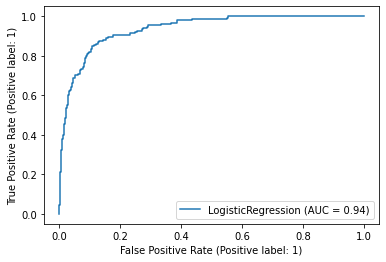

In [303]:
from sklearn.metrics import plot_roc_curve
LOR_disp = plot_roc_curve(LOR, X_test, y_test)
plt.show()

In [304]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test, y_test)

# print("Depth: ", DT.get_depth())
# print("Leaves: ", DT.get_n_leaves())

# from sklearn.metrics import confusion_matrix
# y_pred = DT.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# cm

# from sklearn.model_selection import cross_val_score
# print(cross_val_score(DT, X, y, cv=10, scoring='accuracy').mean())

# from sklearn.metrics import plot_roc_curve
# DT_disp = plot_roc_curve(DT, X_test, y_test)
# plt.show()

0.947680157946693

In [305]:
from sklearn.metrics import confusion_matrix
y_pred = DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[841,  21],
       [ 32, 119]])

In [306]:
print("Depth: ", DT.get_depth())
print("Leaves: ", DT.get_n_leaves())

Depth:  19
Leaves:  399


In [307]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DT, X, y, cv=10, scoring='accuracy').mean())

0.9112254134980432
